In [1]:
import sys
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img_root =  f'{path_data}/imgs/grafici/{level}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/covid19-{level}.csv'

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
# df_n_raw
list(df_n_raw.columns)

['data',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'ingressi_terapia_intensiva',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'variazione_terapia_intensiva',
 'variazione_ricoverati_con_sintomi',
 'variazione_totale_ospedalizzati',
 'variazione_isolamento_domiciliare',
 'nuovi_dimessi_guariti',
 'nuovi_deceduti',
 'nuovi_tamponi',
 'nuovi_casi_testati',
 'ti_su_to',
 'to_su_tp',
 'np_su_nt',
 'np_su_nct',
 'var_ti_perc',
 'var_pos_perc']

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 22865
Nuovi tamponi: 339635.0
Percentuale nuovi positivi/nuovi tamponi: 7.000000000000001 %
Nuovi guariti: 13488.0
Nuovi deceduti: 339.0
Variazione positivi ricoverati con sintomi: 394.0
Variazione positivi in terapia intensiva: 64.0
Variazione positivi in isolamento dimiciliare: 8560.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,23075,2583,25658,550556,576214,-848,14245,1503900,75332,...,14746.0,347.0,102974.0,44310.0,10.07,4.45,13.83,32.15,0.54,-0.15
1,2021-01-04T17:00:00,23317,2579,25896,544562,570458,-5756,10800,1520106,75680,...,16206.0,348.0,77993.0,35417.0,9.96,4.54,13.85,30.49,-0.15,-1.00
2,2021-01-05T17:00:00,23395,2569,25964,543197,569161,-1297,15378,1536129,76329,...,16023.0,649.0,135106.0,54512.0,9.89,4.56,11.38,28.21,-0.39,-0.23
3,2021-01-06T17:00:00,23174,2571,25745,542967,568712,-449,20331,1556356,76877,...,20227.0,548.0,178596.0,75719.0,9.99,4.53,11.38,26.85,0.08,-0.08
4,2021-01-07T17:00:00,23291,2587,25878,545177,571055,2343,18020,1572015,77291,...,15659.0,414.0,121275.0,53423.0,10.00,4.53,14.86,33.73,0.62,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,18638,2231,20869,401498,422367,10401,17455,2405199,97699,...,6847.0,192.0,257024.0,104451.0,10.69,4.94,6.79,16.71,0.68,2.52
57,2021-03-01T17:00:00,19112,2289,21401,402932,424333,1966,13114,2416093,97945,...,10894.0,246.0,170633.0,66978.0,10.70,5.04,7.69,19.58,2.60,0.47
58,2021-03-02T17:00:00,19570,2327,21897,409099,430996,6663,17083,2426150,98288,...,10057.0,343.0,335983.0,105249.0,10.63,5.08,5.08,16.23,1.66,1.57
59,2021-03-03T17:00:00,19763,2411,22174,415247,437421,6425,20884,2440218,98635,...,14068.0,347.0,358884.0,115872.0,10.87,5.07,5.82,18.02,3.61,1.49


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'nuovi_tamponi': {'label': 'Nuovi tamponi', 'file_name': 'nuovi_tamponi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

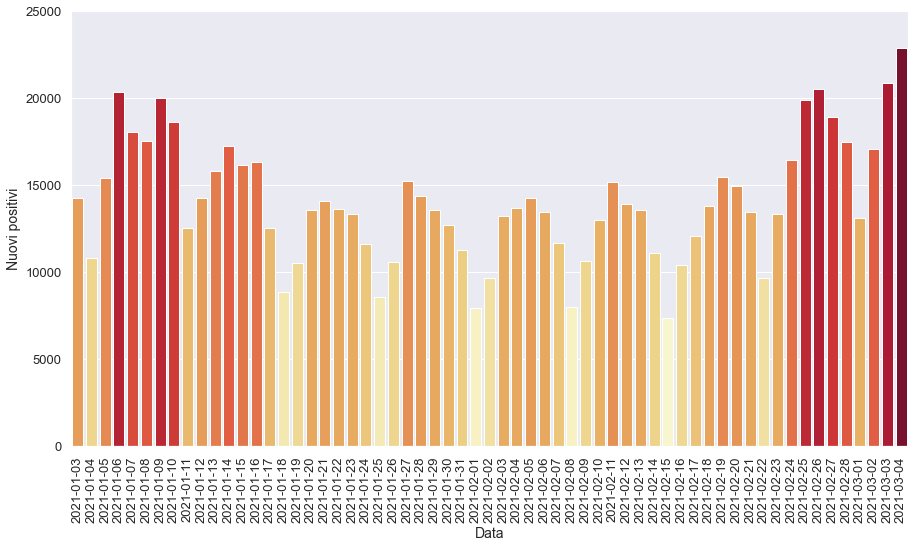

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

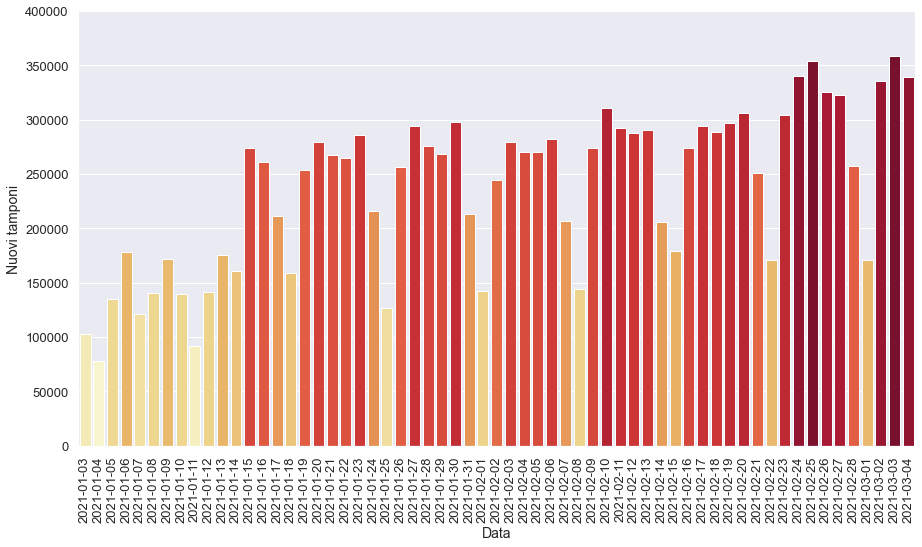

In [9]:
# New swabs
y_col = 'nuovi_tamponi'
fig = bp.draw_bar_plot(y_col=y_col)

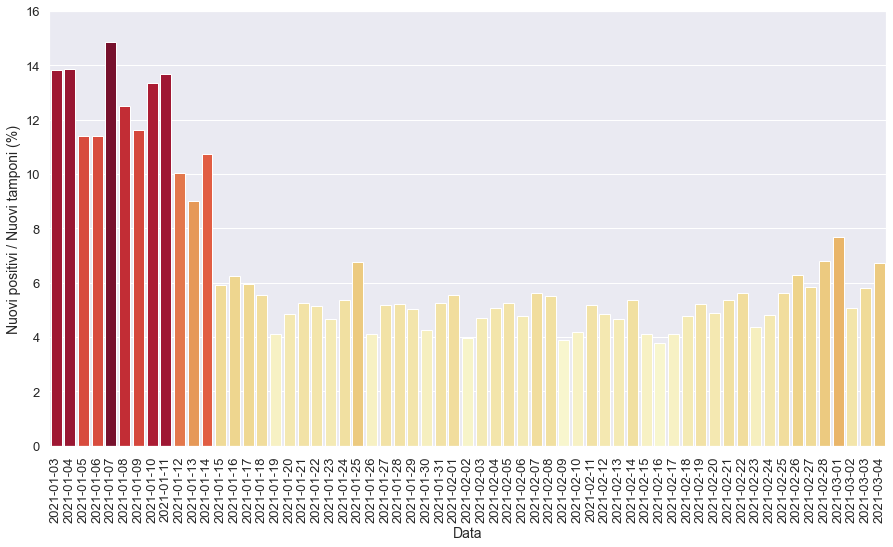

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

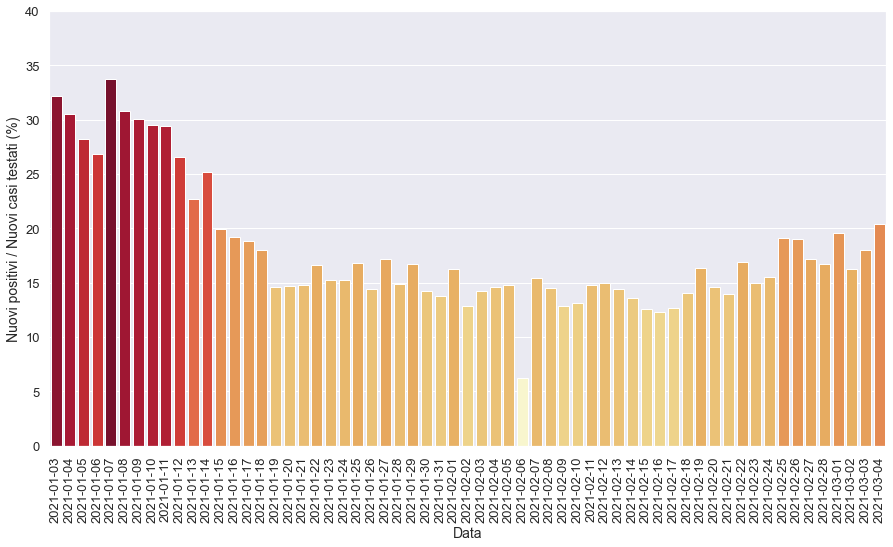

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

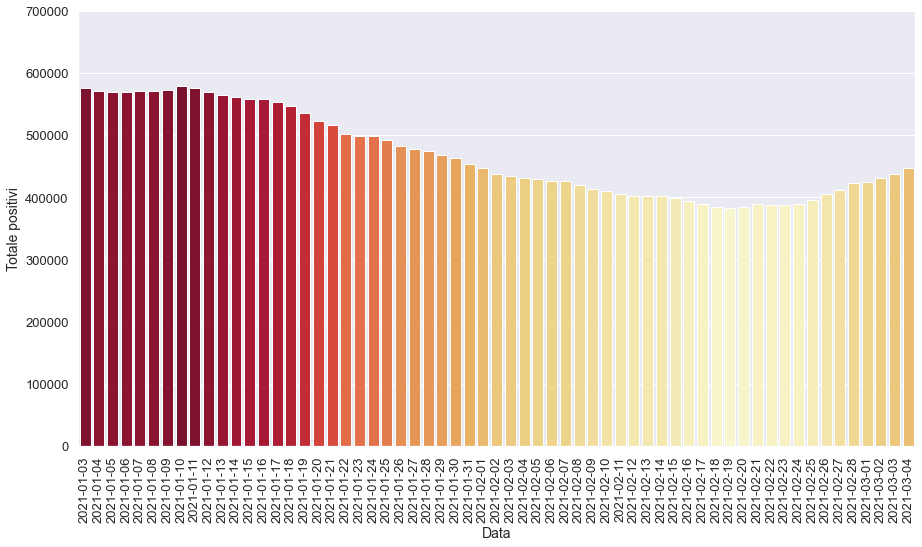

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

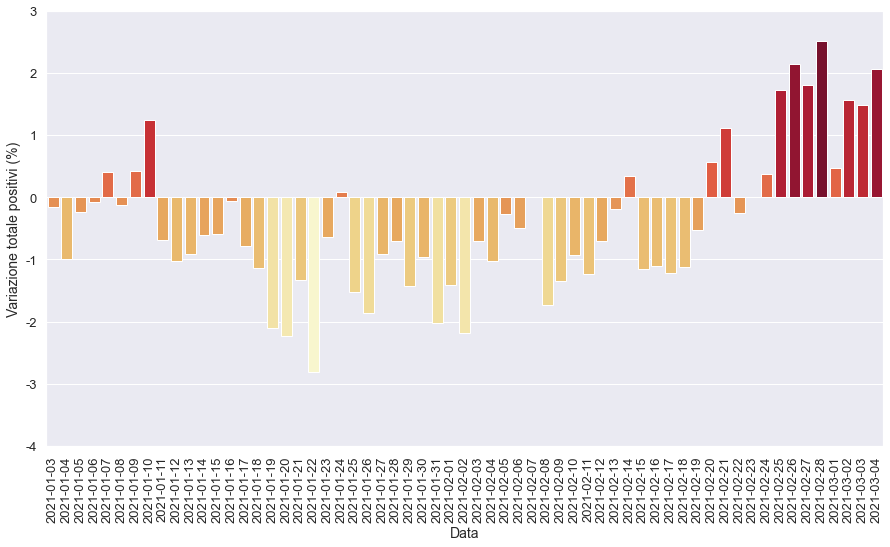

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

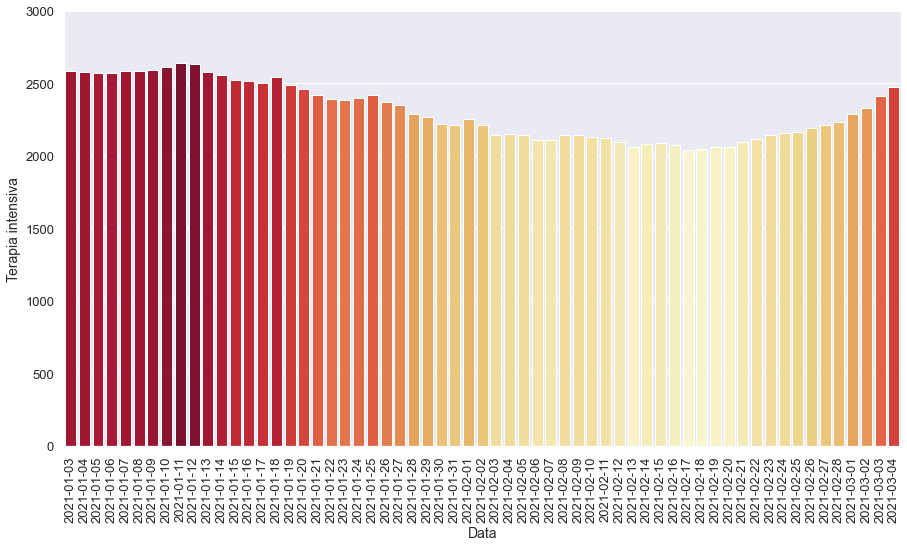

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

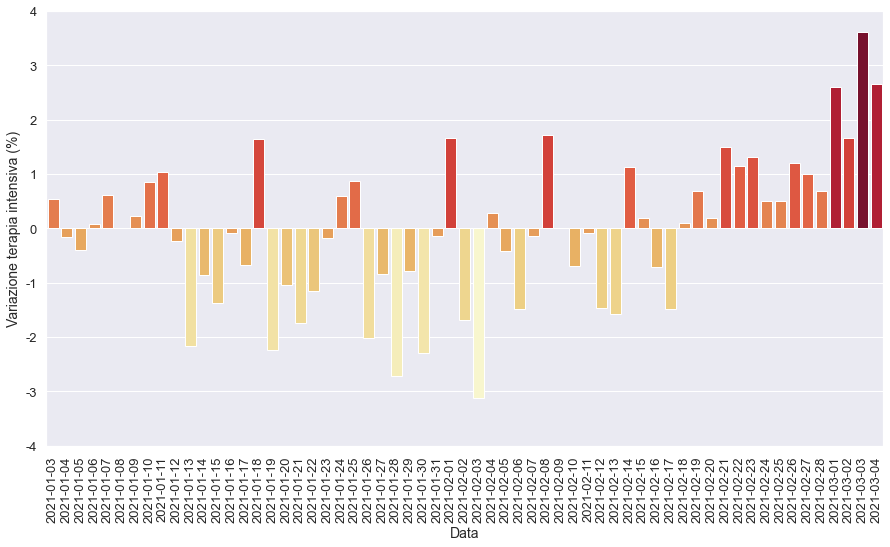

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

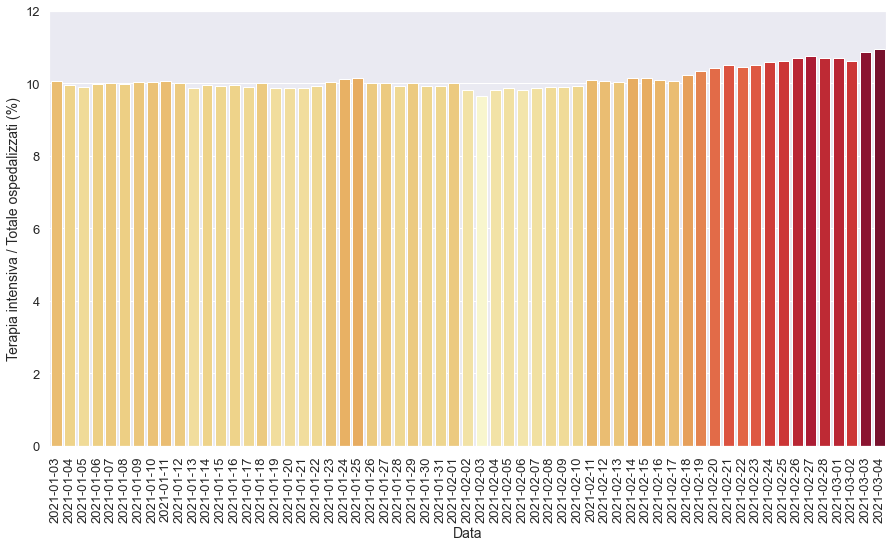

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

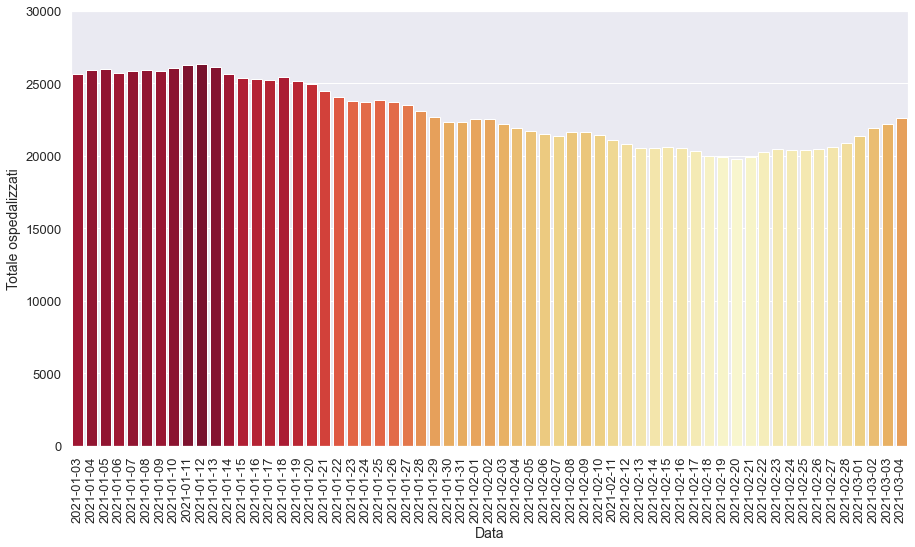

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

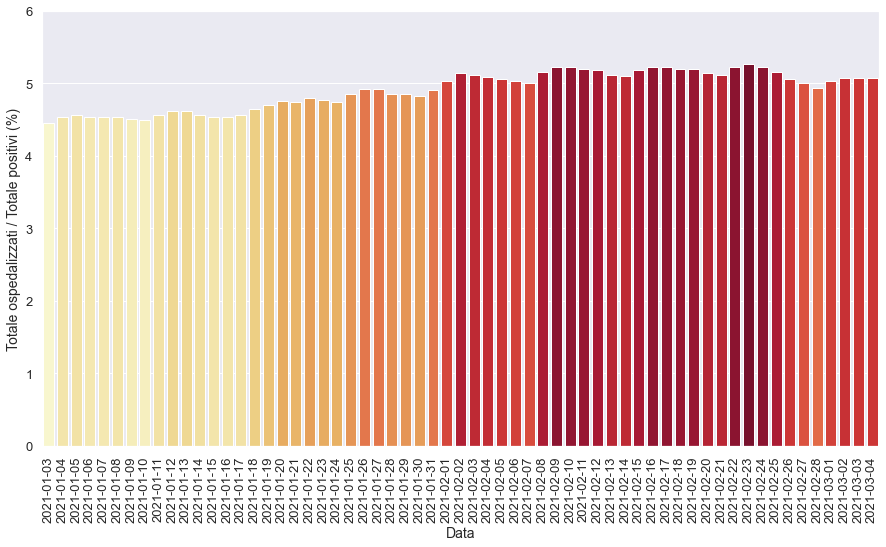

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

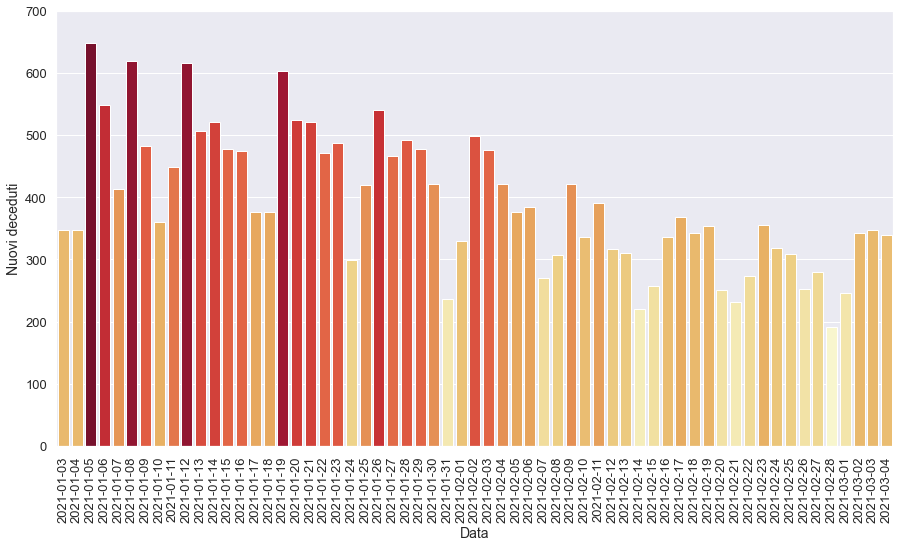

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

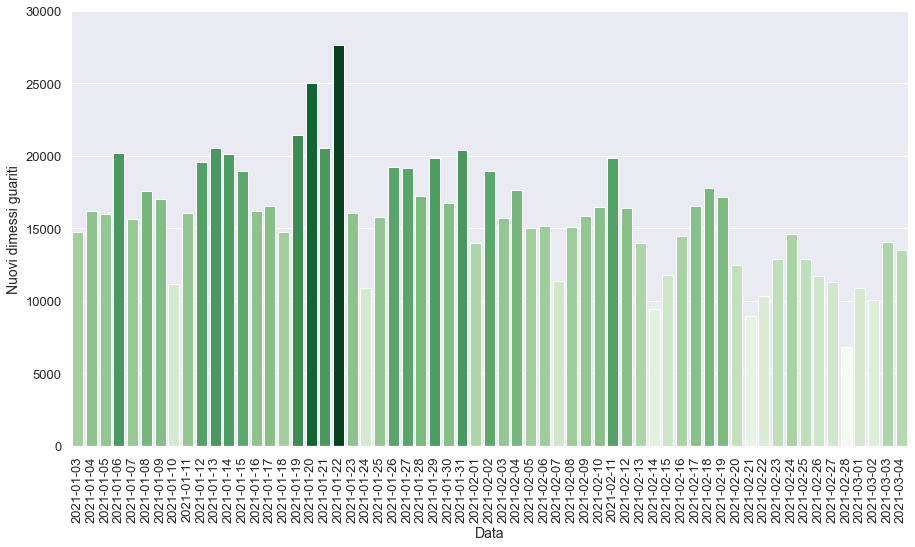

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,20317,2214,22531,415234,437765,-9824,9660,2043500,89343,...,18977.0,498.0,244429.0,75200.0,9.83,5.15,3.95,12.85,-1.69,-2.19
1,2021-02-03T17:00:00,20071,2145,22216,412506,434722,-3043,13189,2059248,89819,...,15748.0,476.0,279307.0,92902.0,9.66,5.11,4.72,14.20,-3.12,-0.70
2,2021-02-04T17:00:00,19743,2151,21894,408383,430277,-4445,13659,2076928,90241,...,17680.0,422.0,270142.0,93437.0,9.82,5.09,5.06,14.62,0.28,-1.02
3,2021-02-05T17:00:00,19575,2142,21717,407401,429118,-1159,14218,2091923,90618,...,14995.0,377.0,270507.0,96247.0,9.86,5.06,5.26,14.77,-0.42,-0.27
4,2021-02-06T17:00:00,19408,2110,21518,405516,427034,-2084,13442,2107061,91003,...,15138.0,385.0,282407.0,214748.0,9.81,5.04,4.76,6.26,-1.49,-0.49
5,2021-02-07T17:00:00,19266,2107,21373,405651,427024,-10,11641,2118441,91273,...,11380.0,270.0,206789.0,75611.0,9.86,5.01,5.63,15.40,-0.14,-0.00
6,2021-02-08T17:00:00,19527,2143,21670,397934,419604,-7420,7970,2133523,91580,...,15082.0,307.0,144270.0,54895.0,9.89,5.16,5.52,14.52,1.71,-1.74
7,2021-02-09T17:00:00,19512,2143,21655,392312,413967,-5637,10630,2149350,92002,...,15827.0,422.0,274263.0,82716.0,9.90,5.23,3.88,12.85,0.00,-1.34
8,2021-02-10T17:00:00,19280,2128,21408,388703,410111,-3856,12956,2165817,92338,...,16467.0,336.0,310994.0,98617.0,9.94,5.22,4.17,13.14,-0.70,-0.93
9,2021-02-11T17:00:00,18942,2126,21068,383951,405019,-5092,15146,2185655,92729,...,19838.0,391.0,292533.0,102605.0,10.09,5.20,5.18,14.76,-0.09,-1.24


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

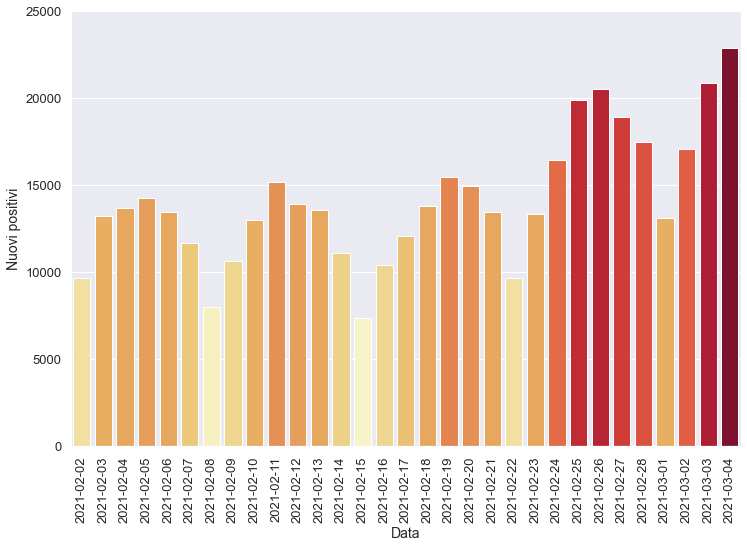

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

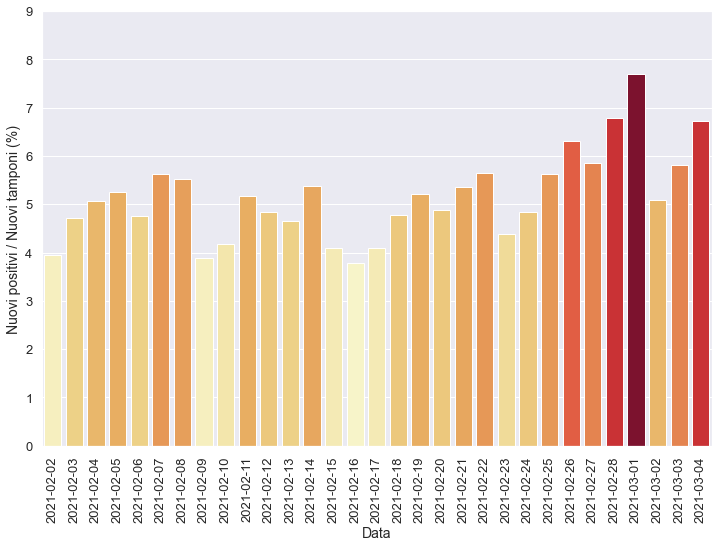

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

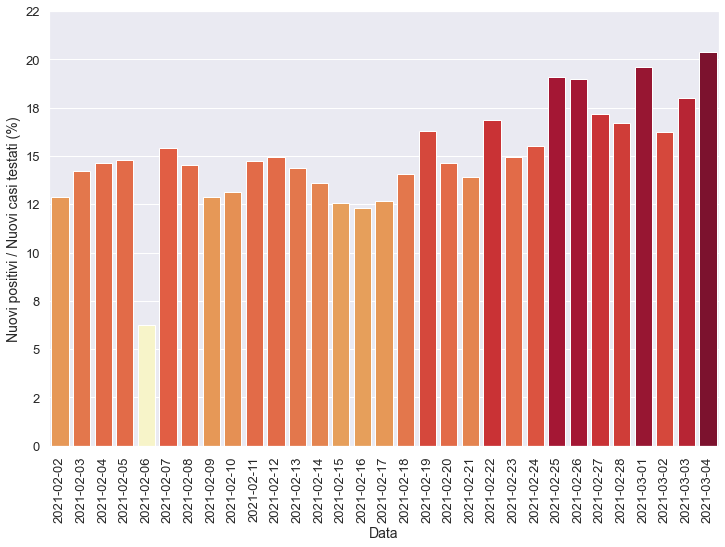

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

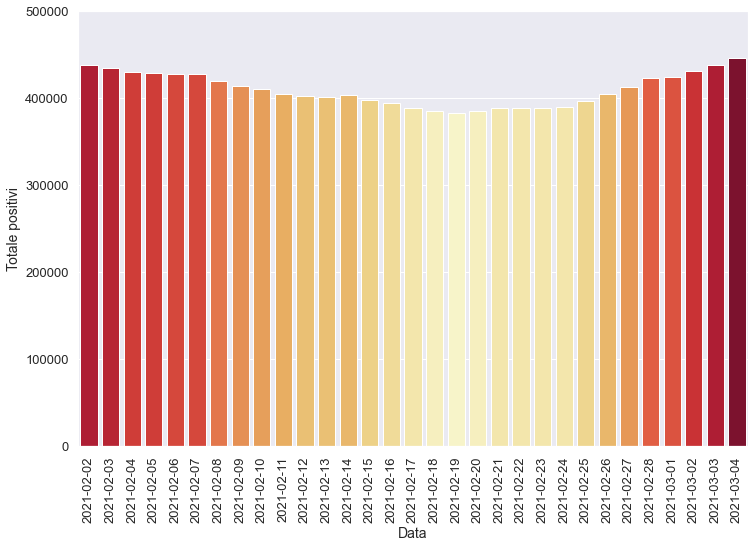

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

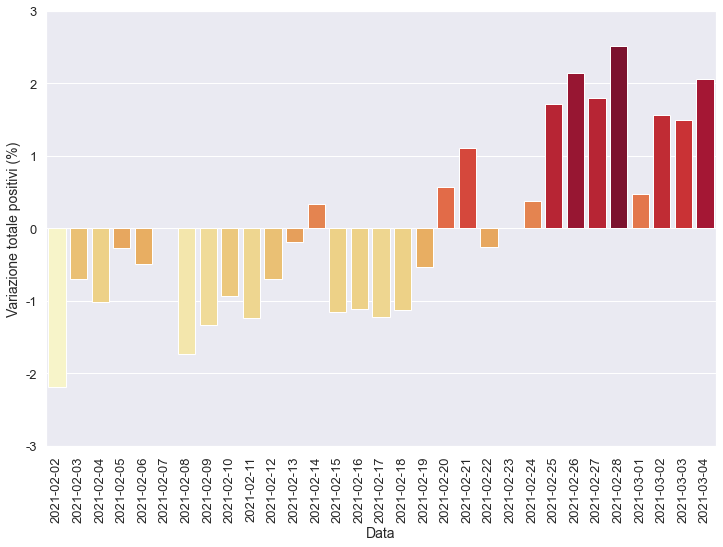

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

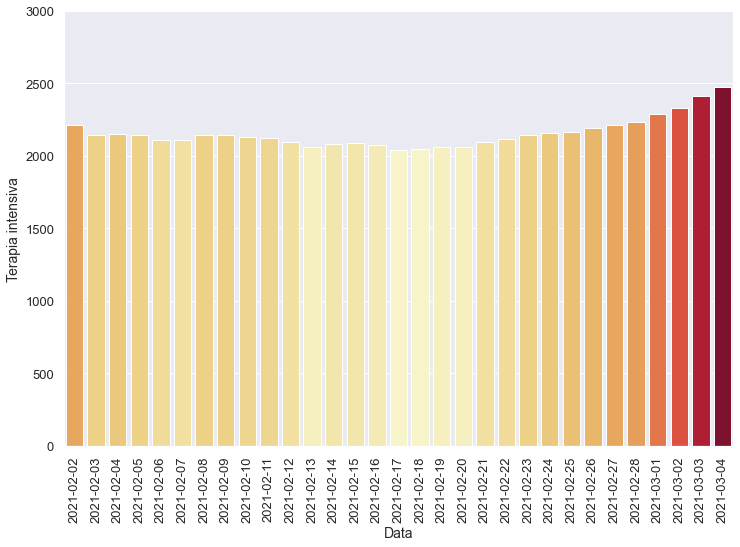

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

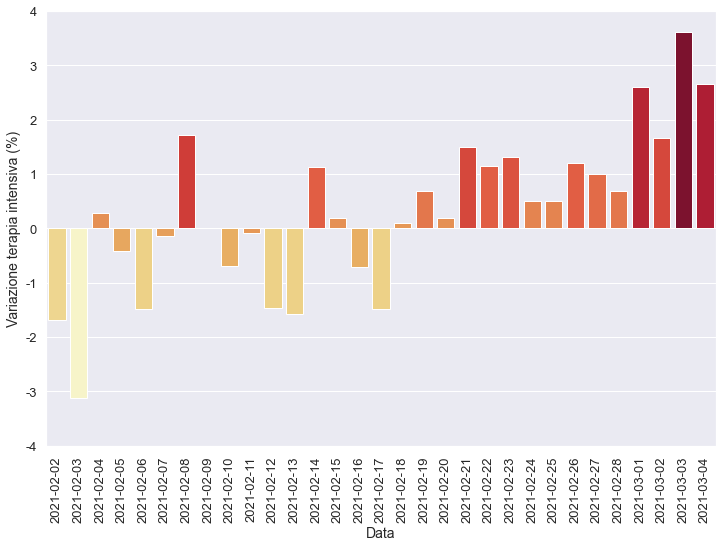

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

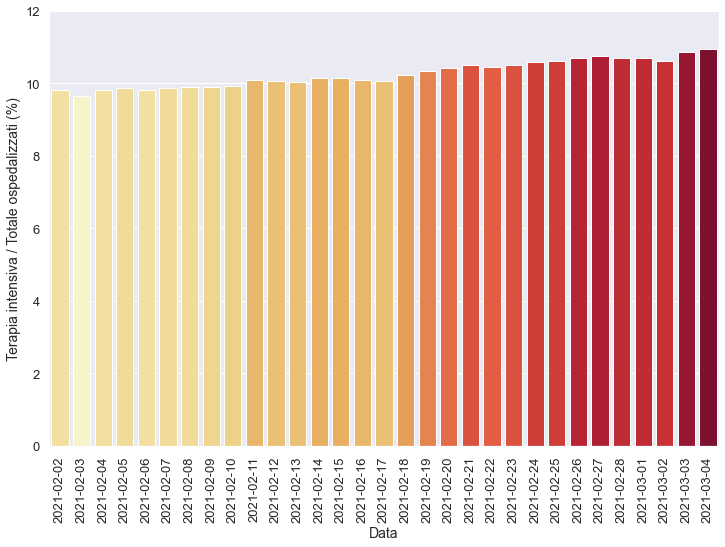

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

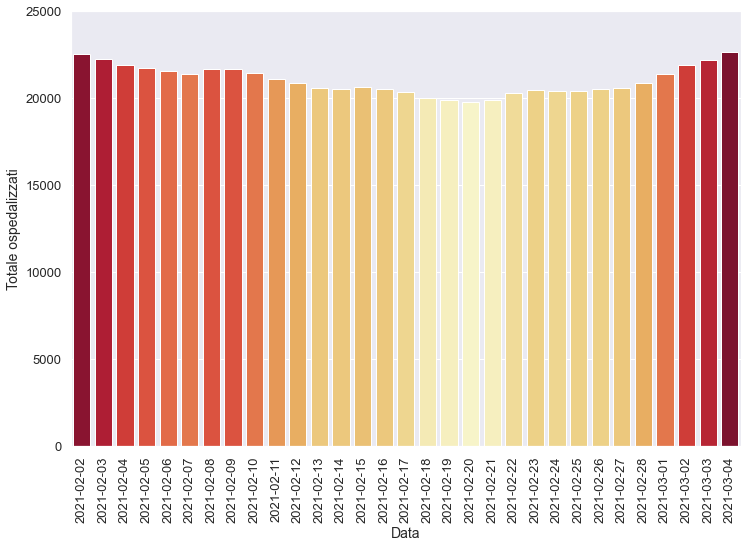

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

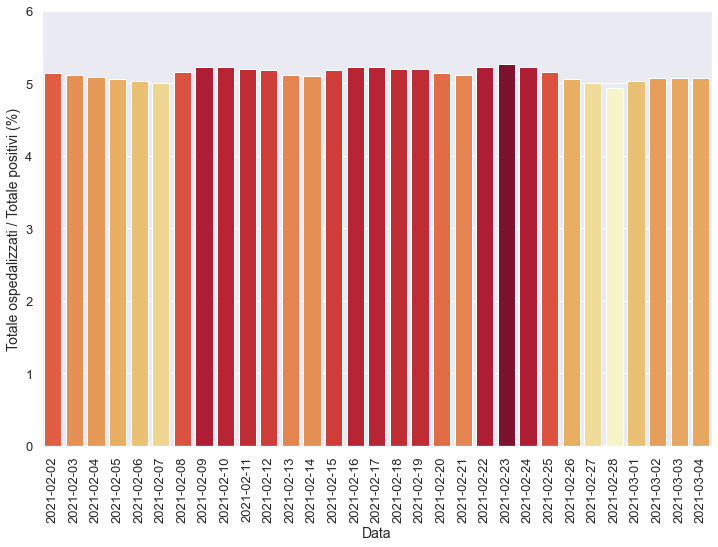

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

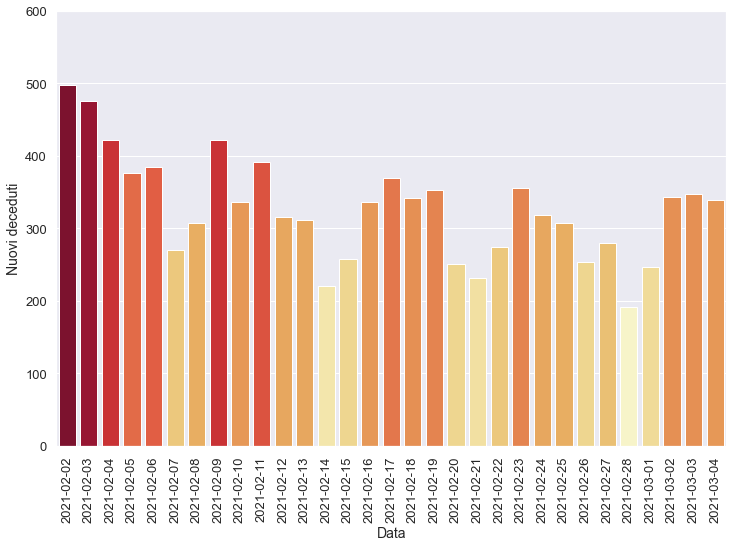

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

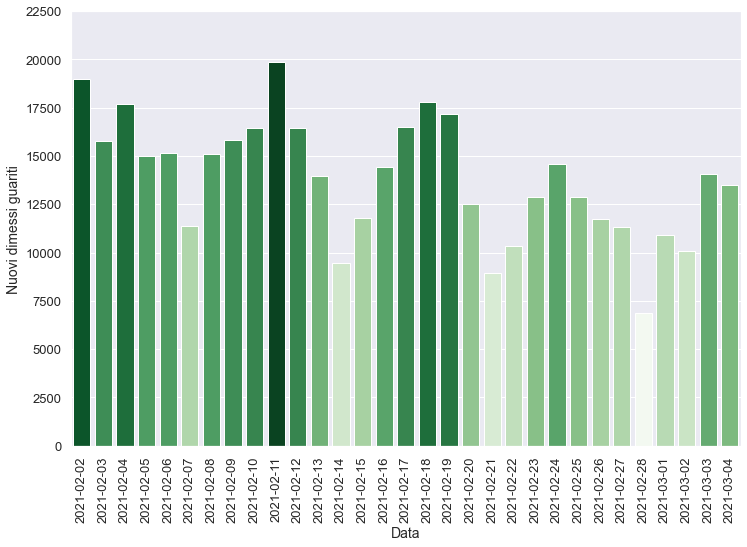

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,18257,2168,20425,375718,396143,6710,19886,2375318,96974,...,12853.0,308.0,353704.0,104200.0,10.61,5.16,5.62,19.08,0.51,1.72
1,2021-02-26T17:00:00,18292,2194,20486,384178,404664,8521,20499,2387032,97227,...,11714.0,253.0,325404.0,107952.0,10.71,5.06,6.30,18.99,1.20,2.15
2,2021-02-27T17:00:00,18372,2216,20588,391378,411966,7302,18916,2398352,97507,...,11320.0,280.0,323047.0,110202.0,10.76,5.00,5.86,17.16,1.00,1.80
3,2021-02-28T17:00:00,18638,2231,20869,401498,422367,10401,17455,2405199,97699,...,6847.0,192.0,257024.0,104451.0,10.69,4.94,6.79,16.71,0.68,2.52
4,2021-03-01T17:00:00,19112,2289,21401,402932,424333,1966,13114,2416093,97945,...,10894.0,246.0,170633.0,66978.0,10.70,5.04,7.69,19.58,2.60,0.47
5,2021-03-02T17:00:00,19570,2327,21897,409099,430996,6663,17083,2426150,98288,...,10057.0,343.0,335983.0,105249.0,10.63,5.08,5.08,16.23,1.66,1.57
6,2021-03-03T17:00:00,19763,2411,22174,415247,437421,6425,20884,2440218,98635,...,14068.0,347.0,358884.0,115872.0,10.87,5.07,5.82,18.02,3.61,1.49
7,2021-03-04T17:00:00,20157,2475,22632,423807,446439,9018,22865,2453706,98974,...,13488.0,339.0,339635.0,112202.0,10.94,5.07,6.73,20.38,2.65,2.06


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

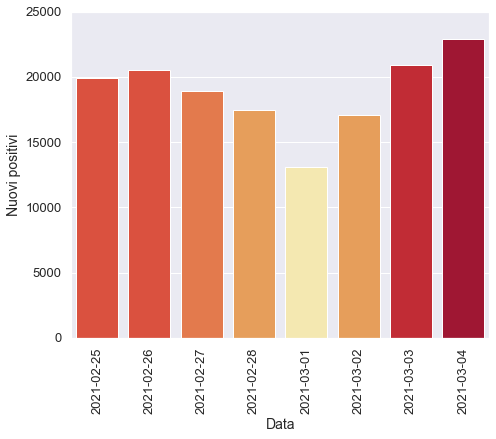

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

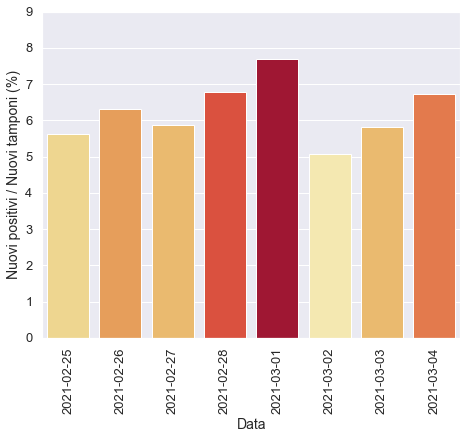

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

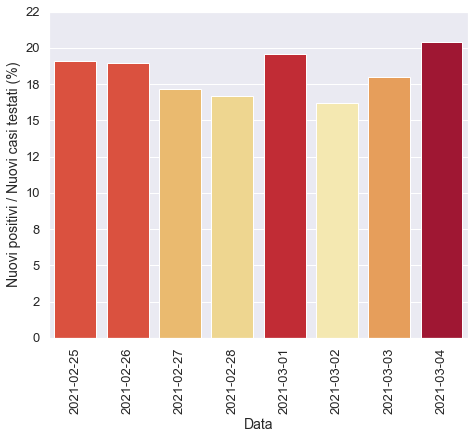

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

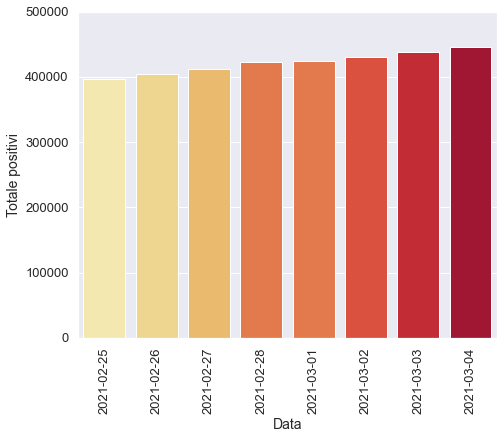

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

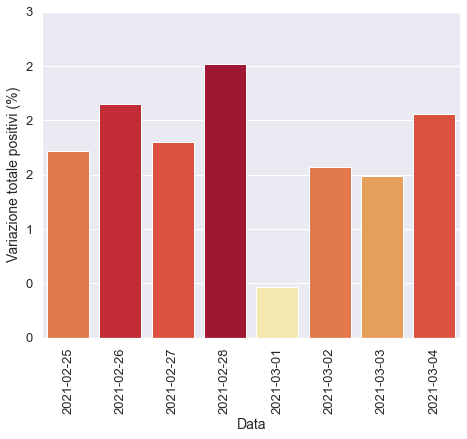

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

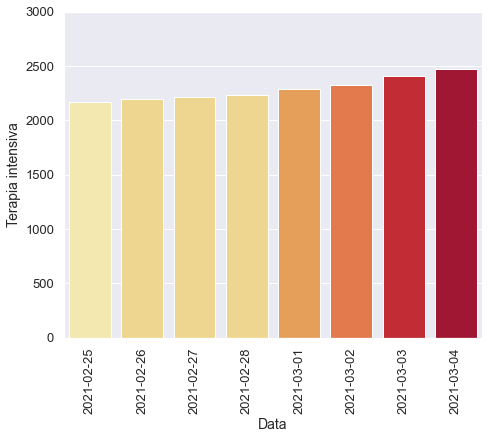

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

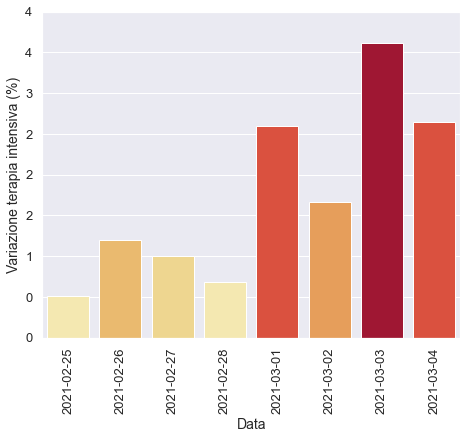

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

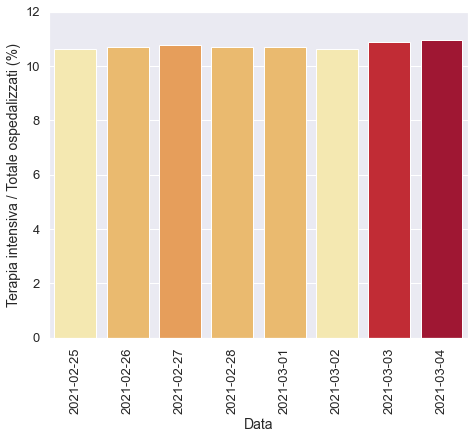

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

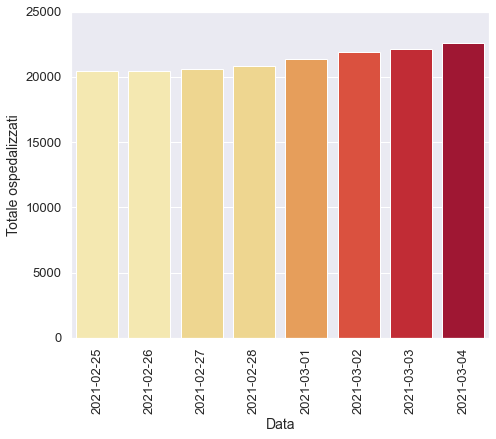

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

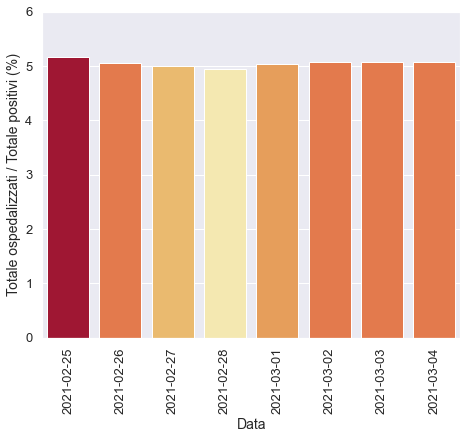

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

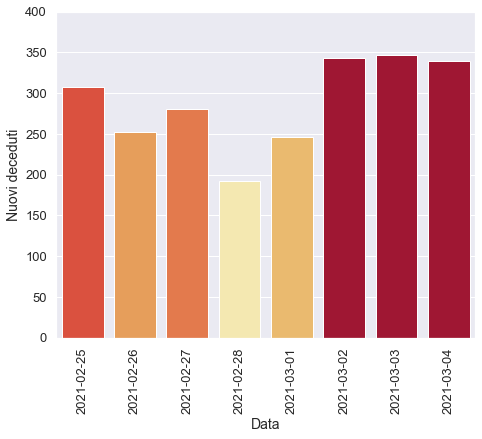

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

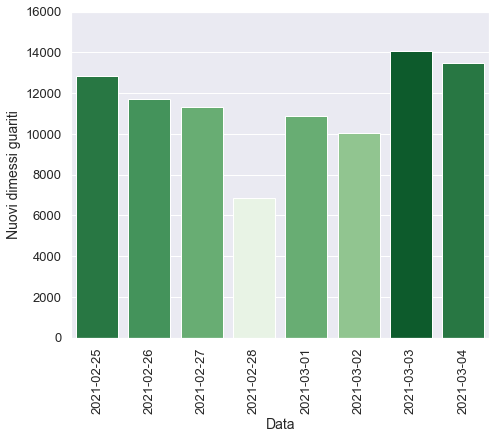

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)